# K-Means + Visualization 
---
---

## Determine optimal K using elbow and silhouette methods.

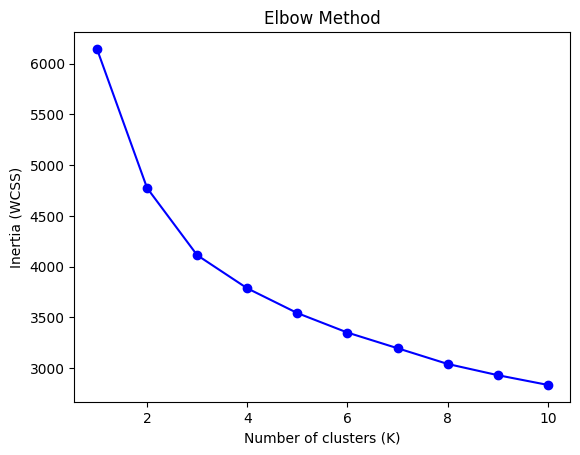

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("../data/clean_data.csv")

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()

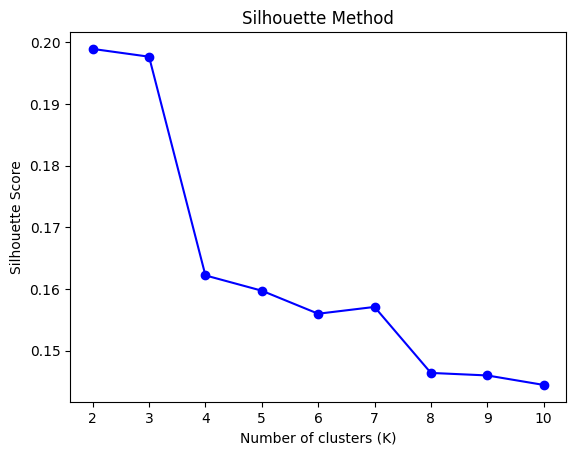

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


## Train K-Means model with chosen K.

In [14]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("../data/clean_data.csv")

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

labels = kmeans.labels_


df['Cluster'] = labels

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.671008,0.866319,-0.006738,0.671668,0.566821,0.221010,0.802700,1.548902,0
1,-0.854732,-1.200646,-0.551449,-0.003369,-1.199918,-0.865349,-0.320802,-0.167395,1
2,1.281304,2.014633,-0.733019,0.019132,0.496408,-1.377489,0.985880,-0.077064,0
3,-0.854732,-1.069410,-0.551449,-0.678407,-0.633409,-0.632557,-1.069803,-1.070710,1
4,-1.159880,0.505421,-2.911863,0.671668,0.550818,1.695354,0.094405,0.013267,0


## Visualize cluster distribution.

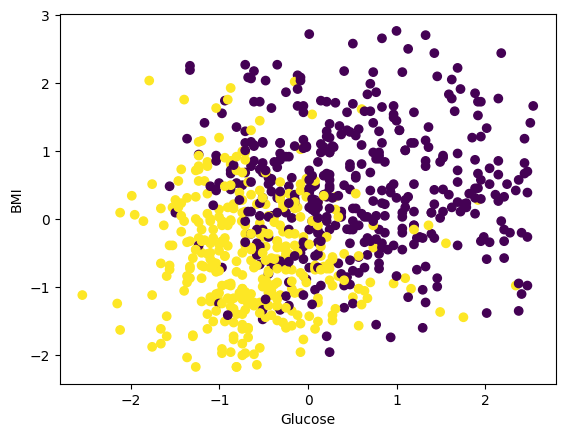

In [22]:

plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()